In [2]:
#pip install finance-datareader

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import FinanceDataReader as fdr
from tensorflow.keras import layers, Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [4]:
df = fdr.DataReader('005930', '2018-01-01', '2021-12-31')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919
...,...,...,...,...,...,...
2021-12-24,80200,80800,80200,80500,12086380,0.007509
2021-12-27,80600,80600,79800,80200,10783368,-0.003727
2021-12-28,80200,80400,79700,80300,18226325,0.001247


In [5]:
scaler = StandardScaler()
scaler.fit(df)
output = scaler.transform(df)
output = pd.DataFrame(output, columns=df.columns, index=list(df.index.values))
print(output.head())

                Open      High       Low     Close    Volume    Change
2018-01-02 -0.411393 -0.445502 -0.415429 -0.457094 -1.518083  0.035836
2018-01-03 -0.331581 -0.366277 -0.371117 -0.414741 -1.514913  0.666367
2018-01-04 -0.360479 -0.392230 -0.425122 -0.452858 -1.511450 -0.657598
2018-01-05 -0.416897 -0.396328 -0.386349 -0.379448 -1.516010  1.178774
2018-01-08 -0.341214 -0.369008 -0.365578 -0.386506 -1.518269 -0.148630


In [6]:
raw_X = output.drop(columns='Close')
raw_y = output['Close']

In [7]:
raw_X[i:i + window_size]

NameError: name 'i' is not defined

In [12]:
window_size = 5

X, y = [], []
for i in range(len(raw_X) - window_size):
    cur_prices = raw_X[i:i + window_size]
    target = raw_y[i + window_size]

    X.append(np.array(cur_prices))
    y.append(target)

# X와 y를 numpy array로 변환합니다.
X = np.array(X)
y = np.array(y)

In [13]:
# 학습 데이터는 전체 데이터의 80%, 테스트 데이터는 20%로 설정합니다.
total_len = len(X)
train_len = int(total_len * 0.8)

X_train, y_train = X[:train_len], y[:train_len]
X_test, y_test = X[train_len:], y[train_len:]

In [ ]:
def build_rnn_model(window_size, num_features):

    # TODO: [지시사항 1번] SimpleRNN 기반 모델을 구성하세요.



    return model

def build_lstm_model(window_size, num_features):

    # TODO: [지시사항 2번] LSTM 기반 모델을 구성하세요.


    return model

def build_gru_model(window_size, num_features):

    # TODO: [지시사항 3번] GRU 기반 모델을 구성하세요.



    return model

### RNN

In [ ]:
name = 'rnn'

model = build_rnn_model(window_size, X_train.shape[1])

model.compile(optimizer='adam', loss="mse")

hist = model.fit(X_train, y_train, batch_size=128, epochs=20, shuffle=True, verbose=2)

# 테스트 데이터셋으로 모델을 테스트합니다.
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("[{}] 테스트 loss: {:.5f}".format(name, test_loss))

Epoch 1/20
7/7 - 1s - loss: 0.2327 - 1s/epoch - 152ms/step
Epoch 2/20
7/7 - 0s - loss: 0.0552 - 89ms/epoch - 13ms/step
Epoch 3/20
7/7 - 0s - loss: 0.0313 - 90ms/epoch - 13ms/step
Epoch 4/20
7/7 - 0s - loss: 0.0187 - 97ms/epoch - 14ms/step
Epoch 5/20
7/7 - 0s - loss: 0.0151 - 95ms/epoch - 14ms/step
Epoch 6/20
7/7 - 0s - loss: 0.0118 - 116ms/epoch - 17ms/step
Epoch 7/20
7/7 - 0s - loss: 0.0098 - 96ms/epoch - 14ms/step
Epoch 8/20
7/7 - 0s - loss: 0.0087 - 92ms/epoch - 13ms/step
Epoch 9/20
7/7 - 0s - loss: 0.0078 - 108ms/epoch - 15ms/step
Epoch 10/20
7/7 - 0s - loss: 0.0076 - 95ms/epoch - 14ms/step
Epoch 11/20
7/7 - 0s - loss: 0.0074 - 91ms/epoch - 13ms/step
Epoch 12/20
7/7 - 0s - loss: 0.0071 - 96ms/epoch - 14ms/step
Epoch 13/20
7/7 - 0s - loss: 0.0077 - 99ms/epoch - 14ms/step
Epoch 14/20
7/7 - 0s - loss: 0.0054 - 101ms/epoch - 14ms/step
Epoch 15/20
7/7 - 0s - loss: 0.0065 - 88ms/epoch - 13ms/step
Epoch 16/20
7/7 - 0s - loss: 0.0056 - 110ms/epoch - 16ms/step
Epoch 17/20
7/7 - 0s - loss: 0

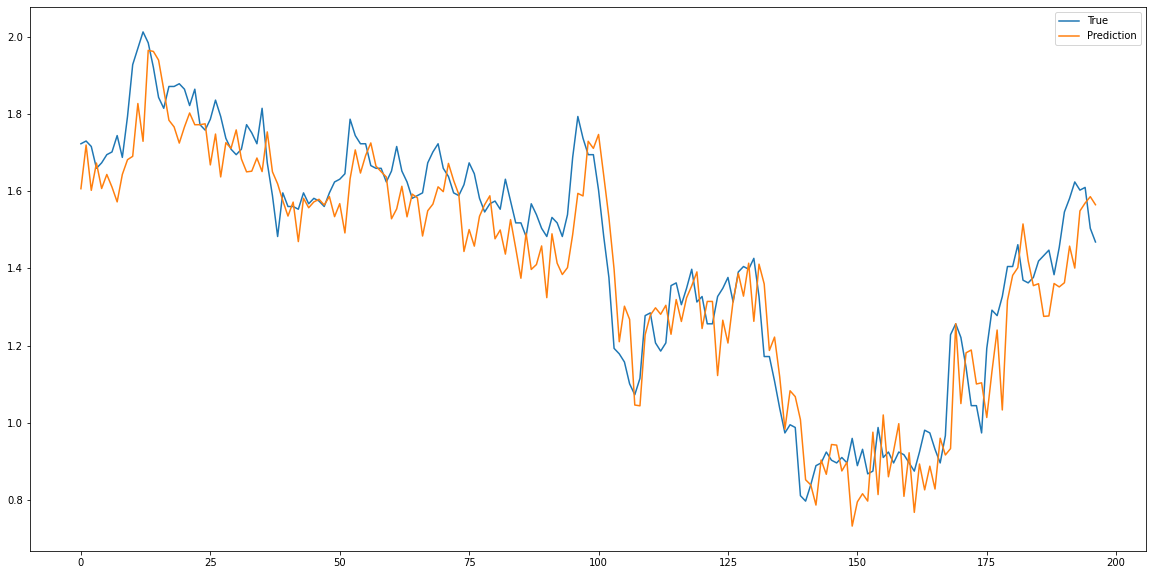

In [ ]:
pred_rnn = model.predict(X_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred_rnn, label='Prediction')
ax.legend()
plt.show()

### LSTM

In [ ]:
name = 'lstm'

model = build_lstm_model(window_size, X_train.shape[1])

model.compile(optimizer='adam', loss="mse")

hist = model.fit(X_train, y_train, batch_size=128, epochs=20, shuffle=True, verbose=2)

# 테스트 데이터셋으로 모델을 테스트합니다.
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("[{}] 테스트 loss: {:.5f}".format(name, test_loss))

Epoch 1/20
7/7 - 3s - loss: 0.5423 - 3s/epoch - 373ms/step
Epoch 2/20
7/7 - 0s - loss: 0.1053 - 278ms/epoch - 40ms/step
Epoch 3/20
7/7 - 0s - loss: 0.0486 - 270ms/epoch - 39ms/step
Epoch 4/20
7/7 - 0s - loss: 0.0249 - 264ms/epoch - 38ms/step
Epoch 5/20
7/7 - 0s - loss: 0.0253 - 272ms/epoch - 39ms/step
Epoch 6/20
7/7 - 0s - loss: 0.0197 - 264ms/epoch - 38ms/step
Epoch 7/20
7/7 - 0s - loss: 0.0173 - 268ms/epoch - 38ms/step
Epoch 8/20
7/7 - 0s - loss: 0.0164 - 265ms/epoch - 38ms/step
Epoch 9/20
7/7 - 0s - loss: 0.0151 - 265ms/epoch - 38ms/step
Epoch 10/20
7/7 - 0s - loss: 0.0147 - 255ms/epoch - 36ms/step
Epoch 11/20
7/7 - 0s - loss: 0.0140 - 302ms/epoch - 43ms/step
Epoch 12/20
7/7 - 0s - loss: 0.0136 - 264ms/epoch - 38ms/step
Epoch 13/20
7/7 - 0s - loss: 0.0131 - 267ms/epoch - 38ms/step
Epoch 14/20
7/7 - 0s - loss: 0.0127 - 271ms/epoch - 39ms/step
Epoch 15/20
7/7 - 0s - loss: 0.0122 - 278ms/epoch - 40ms/step
Epoch 16/20
7/7 - 0s - loss: 0.0111 - 285ms/epoch - 41ms/step
Epoch 17/20
7/7 - 0

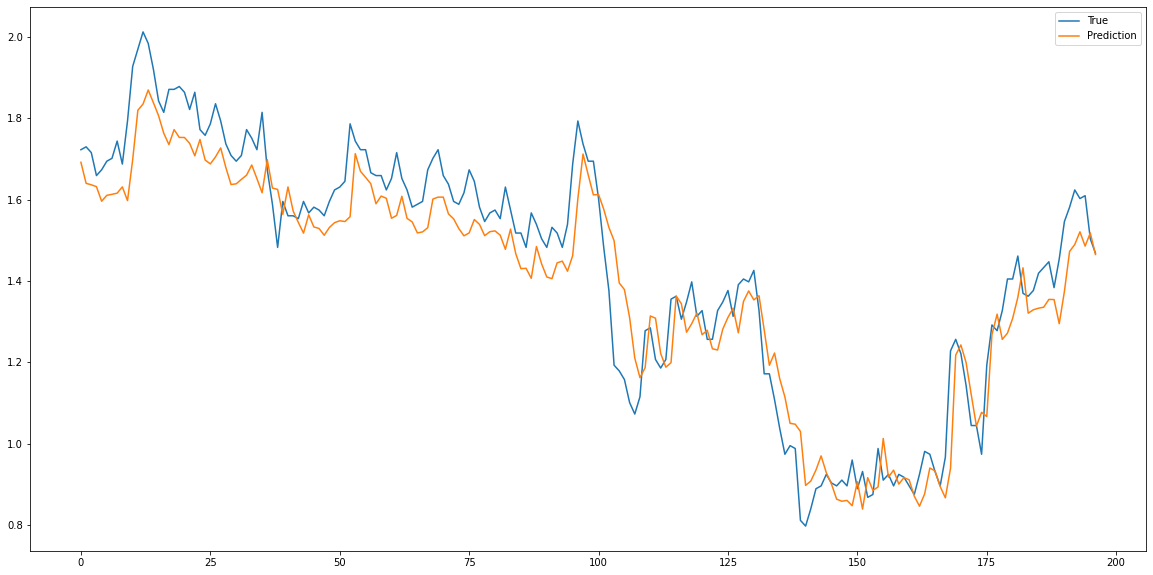

In [ ]:
pred_lstm = model.predict(X_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred_lstm, label='Prediction')
ax.legend()
plt.show()

### GRU

In [ ]:
name = 'gru'

model = build_gru_model(window_size, X_train.shape[1])

model.compile(optimizer='adam', loss="mse")

hist = model.fit(X_train, y_train, batch_size=128, epochs=20, shuffle=True, verbose=2)

# 테스트 데이터셋으로 모델을 테스트합니다.
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("[{}] 테스트 loss: {:.5f}".format(name, test_loss))

Epoch 1/20
7/7 - 3s - loss: 0.3074 - 3s/epoch - 425ms/step
Epoch 2/20
7/7 - 0s - loss: 0.0489 - 211ms/epoch - 30ms/step
Epoch 3/20
7/7 - 0s - loss: 0.0359 - 212ms/epoch - 30ms/step
Epoch 4/20
7/7 - 0s - loss: 0.0231 - 206ms/epoch - 29ms/step
Epoch 5/20
7/7 - 0s - loss: 0.0218 - 211ms/epoch - 30ms/step
Epoch 6/20
7/7 - 0s - loss: 0.0174 - 216ms/epoch - 31ms/step
Epoch 7/20
7/7 - 0s - loss: 0.0153 - 224ms/epoch - 32ms/step
Epoch 8/20
7/7 - 0s - loss: 0.0137 - 214ms/epoch - 31ms/step
Epoch 9/20
7/7 - 0s - loss: 0.0124 - 206ms/epoch - 29ms/step
Epoch 10/20
7/7 - 0s - loss: 0.0111 - 206ms/epoch - 29ms/step
Epoch 11/20
7/7 - 0s - loss: 0.0103 - 211ms/epoch - 30ms/step
Epoch 12/20
7/7 - 0s - loss: 0.0103 - 226ms/epoch - 32ms/step
Epoch 13/20
7/7 - 0s - loss: 0.0098 - 218ms/epoch - 31ms/step
Epoch 14/20
7/7 - 0s - loss: 0.0099 - 218ms/epoch - 31ms/step
Epoch 15/20
7/7 - 0s - loss: 0.0086 - 221ms/epoch - 32ms/step
Epoch 16/20
7/7 - 0s - loss: 0.0075 - 237ms/epoch - 34ms/step
Epoch 17/20
7/7 - 0

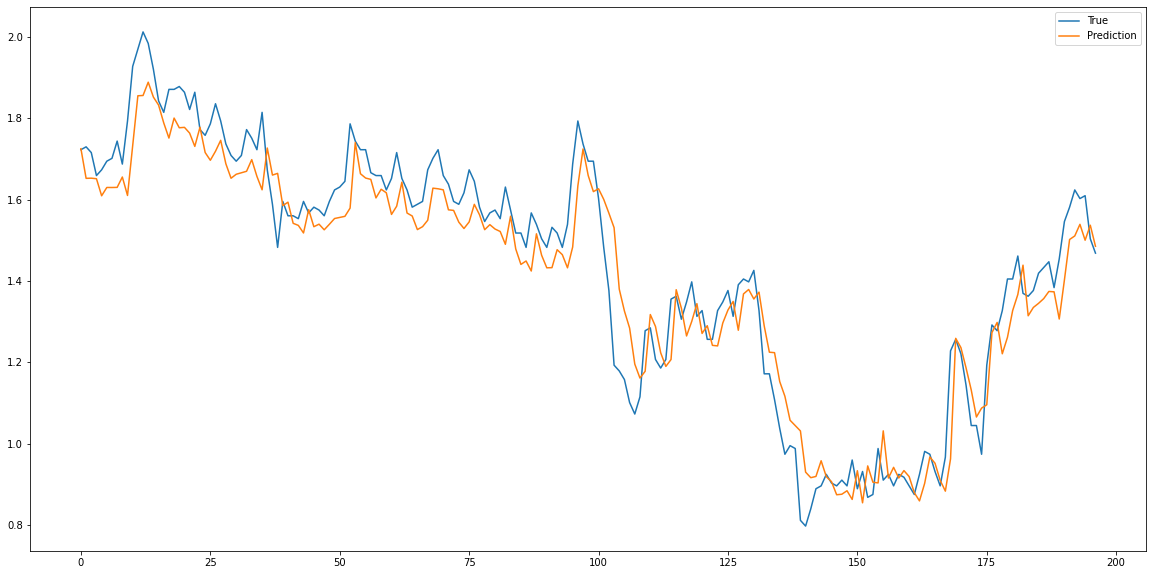

In [ ]:
pred_gru = model.predict(X_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred_gru, label='Prediction')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

mse_rnn = mean_squared_error(y_test, pred_rnn)
mse_lstm = mean_squared_error(y_test, pred_lstm)
mse_gru = mean_squared_error(y_test, pred_gru)

print(f'MSE 비교 RNN: {mse_rnn}, LSTM: {mse_lstm}, GRU: {mse_gru}')

# MSE 비교 RNN: 0.011486526594265606, LSTM: 0.009390137152817134, GRU: 0.007858096674693343

MSE 비교 RNN: 0.011486526594265606, LSTM: 0.009390137152817134, GRU: 0.007858096674693343


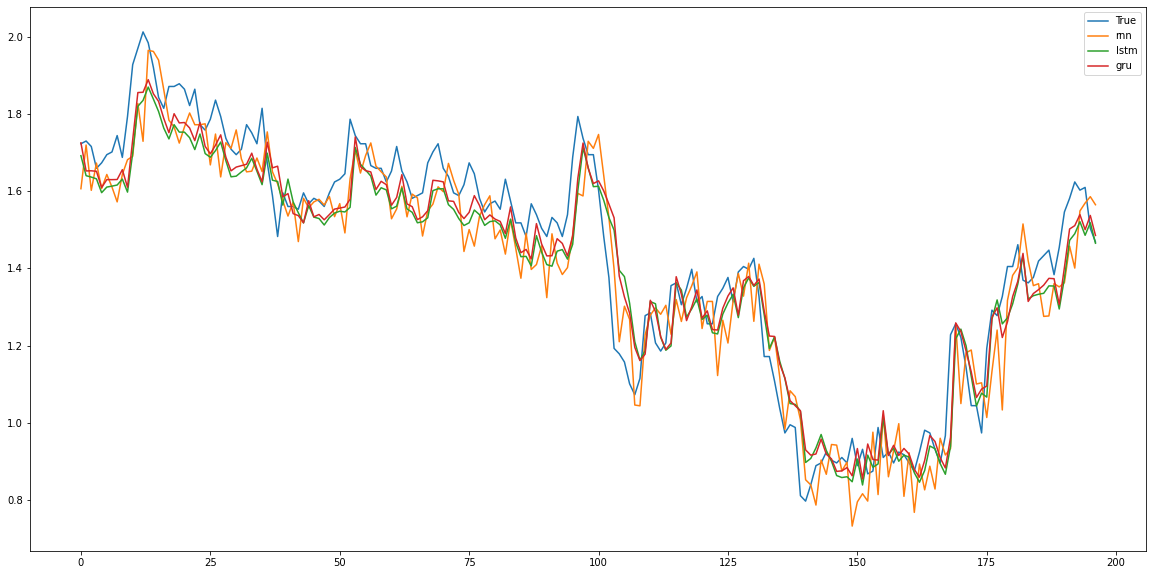

In [ ]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred_rnn, label='rnn')
ax.plot(pred_lstm, label='lstm')
ax.plot(pred_gru, label='gru')
ax.legend()
plt.show()

## NLP

In [14]:
# %tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [15]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, Sequential

In [16]:
num_words = 6000
max_len =  130
embedding_len = 100

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

17473536/17464789 [==============================] - 2s 0us/step


In [19]:
model = Sequential()

model.add(layers.Embedding(num_words, embedding_len))
model.add(layers.LSTM(128))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))


In [20]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

hist = model.fit(X_train, y_train, batch_size=128, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
196/196 - 10s - loss: 0.4771 - accuracy: 0.7537 - 10s/epoch - 50ms/step
Epoch 2/10
196/196 - 5s - loss: 0.2766 - accuracy: 0.8875 - 5s/epoch - 26ms/step
Epoch 3/10
196/196 - 5s - loss: 0.2205 - accuracy: 0.9120 - 5s/epoch - 26ms/step
Epoch 4/10
196/196 - 5s - loss: 0.1758 - accuracy: 0.9327 - 5s/epoch - 27ms/step
Epoch 5/10
196/196 - 5s - loss: 0.1354 - accuracy: 0.9496 - 5s/epoch - 27ms/step
Epoch 6/10
196/196 - 5s - loss: 0.1083 - accuracy: 0.9591 - 5s/epoch - 26ms/step
Epoch 7/10
196/196 - 5s - loss: 0.0867 - accuracy: 0.9692 - 5s/epoch - 26ms/step
Epoch 8/10
196/196 - 5s - loss: 0.0743 - accuracy: 0.9738 - 5s/epoch - 26ms/step
Epoch 9/10
196/196 - 5s - loss: 0.0541 - accuracy: 0.9805 - 5s/epoch - 26ms/step
Epoch 10/10
196/196 - 5s - loss: 0.0469 - accuracy: 0.9848 - 5s/epoch - 27ms/step


In [21]:
# 모델을 테스트 데이터셋으로 테스트합니다.
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print()
print("테스트 loss: {:.5f}, 테스트 정확도: {:.3f}%".format(test_loss, test_acc * 100))


테스트 loss: 0.69330, 테스트 정확도: 83.292%
